Для развлекательного мобильного приложения нужно понять причины убытков за последний период. Проанализировать логи, данные об источниках привлечения и поведении пользователей (с какого устройства заходили, время начала и окончания сессии, с какого рекламного источника пришел пользователь, регион пользователя, данные о покупках пользователей, стоимость источника)


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    * — уникальный идентификатор пользователя
    * — категория устройства пользователя
    * — дата и время начала сессии
    * — дата и время окончания сессии
    * — идентификатор рекламного источника, из которого пришел пользователь
    * - страна пользователя

Таблица orders_log_short (информация о заказах):

    * — уникальный id пользователя, который сделал заказ
    * — дата и время покупки
    * — выручка

Таблица costs_short (информация о затратах на маркетинг)

    * — идентификатор рекламного источника
    * — дата
    * — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

# Procrastinate Pro+

## Шаг 1. Предобработка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

### Visits - лог сервера с информацией о посещениях сайта

In [3]:
# функция для приведения к общепринятому стилю 
def style(df):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    return df.head()

style(visits)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
#Проверим, есть ли дубликаты. 
visits[visits.duplicated(keep = False)] # keep = False выведет все совпадения
#таблица пустая - дубликатов нет

,user_id,region,device,channel,session_start,session_end


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null object
session_end      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# преобразуем формат данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

### Orders - информация о заказах

In [7]:
style(orders)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders[orders.duplicated(keep = False)]

,user_id,event_dt,revenue


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null object
revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['dt'] = orders['event_dt'].dt.date

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 4 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dt          40212 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


### Costs - затраты на маркетинг

In [12]:
style(costs)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


In [13]:
#Проверим, есть ли дубликаты. 
costs[costs.duplicated(keep = False)] # keep = False выведет все совпадения
#таблица пустая - дубликатов нет

,dt,channel,costs


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [15]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

## Шаг 2. Функции

### Get_profiles

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Get_retention

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Get_conversion

In [18]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Get_ltv

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для визуализации этих метрик

#### filter_data()

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### plot_retention

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### plot_conversion

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### plot_ltv_roi

In [23]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Профили пользователей

In [24]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, None, costs)

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


### Максимальная и минимальная даты привлечения пользователей

In [25]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(f'Минимальная дата привлечения пользователей: {min_date}') 
print(f'Максимальная дата привлечения пользователей: {max_date}') 

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


### Количество пользователей и конверсия

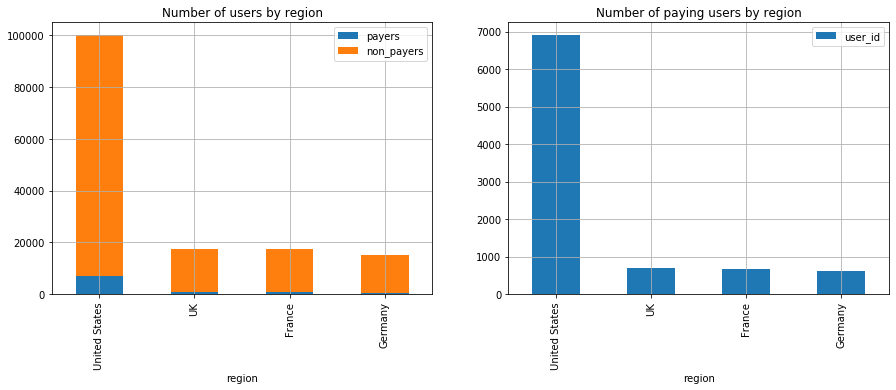

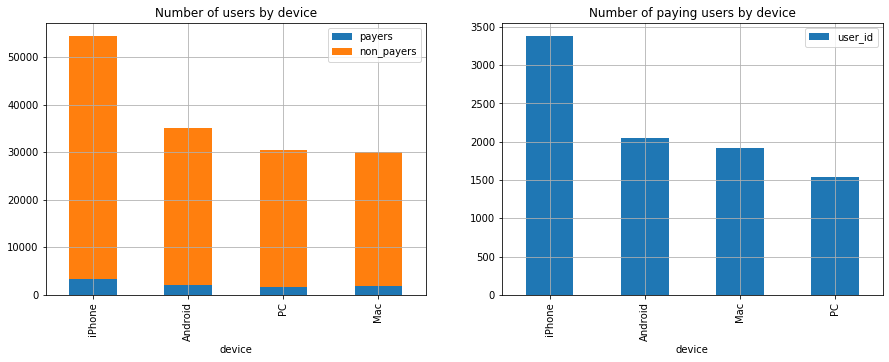

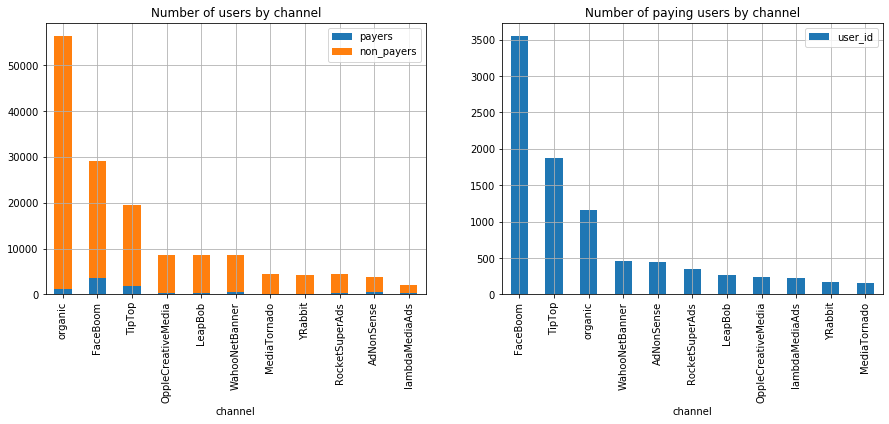

In [26]:
# анализ всех/(не)платящих пользователей в разбивке по странам, устройствам, каналам
parametres = ['region', 'device', 'channel']
for parametr in parametres:
    users_by_region = (
        profiles.groupby(parametr)
        .agg({'user_id' : 'nunique', 'payer' : 'mean'})
        .sort_values(by = 'payer', ascending = False)
    )
    users_by_region = (
        users_by_region.rename(columns = {'user_id' : 'users_total', 'payer' : 'payers_share'})
    )
    users_by_region['payers'] = users_by_region['users_total'] * users_by_region['payers_share']
    users_by_region['non_payers'] = (
        users_by_region['users_total'] * (1 - users_by_region['payers_share'])
    )
    plt.subplots(figsize = (15,5))
    (
    users_by_region[['payers', 'non_payers']]
    .sort_values(by = 'non_payers', ascending = False)
    .plot(ax=plt.subplot(1, 2, 1), kind='bar', stacked=True, grid = True)
    )
    plt.title(f'Number of users by {parametr}')
    (
    profiles.query('payer == True')
    .groupby(parametr).agg({'user_id' : 'nunique'})
    .sort_values(by = 'user_id', ascending = False).plot(ax=plt.subplot(1, 2, 2), kind = 'bar', grid = True)
    )
    plt.title(f'Number of paying users by {parametr}')

In [27]:
# доля платящих пользователей (конверсия) в разбивке по странам
(
    profiles.groupby('region')
    .agg({'user_id' : 'nunique', 'payer' : 'mean'})
    .sort_values(by='payer', ascending = False)
)

,user_id,payer
region,,
United States,100002,0.07
Germany,14981,0.04
UK,17575,0.04
France,17450,0.04


In [28]:
# доля платящих пользователей в разбивке по устройствам
(
    profiles
    .groupby('device').agg({'user_id' : 'nunique', 'payer' : 'mean'})
    .sort_values(by='payer', ascending = False)
    .style.format('{:.3f}', subset=['payer'])
    .format('{:,}', subset=['user_id'])
    .highlight_null(null_color='lightgrey')
    .highlight_max(color='yellowgreen')
    .highlight_min(color='coral')
)

,user_id,payer
device,,
Mac,"30,042",0.064
iPhone,"54,479",0.062
Android,"35,032",0.059
PC,"30,455",0.050


In [29]:
# доля платящих пользователей в разбивке по каналам и странам
(
    profiles.
    pivot_table(index = 'channel', columns = 'region', values = 'payer', aggfunc = 'mean')
    .style.format('{:.2f}')
    .highlight_null(null_color='lightgrey')
    .highlight_max(color='yellowgreen')
    .highlight_min(color='coral')
)

region,France,Germany,UK,United States
channel,,,,
AdNonSense,0.11,0.12,0.11,nan
FaceBoom,nan,nan,nan,0.12
LeapBob,0.03,0.03,0.03,nan
MediaTornado,nan,nan,nan,0.04
OppleCreativeMedia,0.03,0.02,0.03,nan
RocketSuperAds,nan,nan,nan,0.08
TipTop,nan,nan,nan,0.10
WahooNetBanner,0.05,0.06,0.05,nan
YRabbit,nan,nan,nan,0.04


In [30]:
profiles.pivot_table(index = 'channel', columns = 'region', values = 'payer', aggfunc = 'mean')
pd.__version__

'0.25.1'

### Вывод

Лидерами рынка по количеству пользователей являются США, где количество пользователей примерно в семь раз больше, чем в других странах. Также доля платящих пользователей в США выше: 7% против 4% у остальных. 

Разделение по типам устройств более однородно. Конверсия у всех примерно одинаковая 5-6%. 

Посмотрим разбивку пользователей по каналам. Здесь как и в разбивке по странам количество пользователей (и платящих, и не платящих) распределено крайне неравномерно. Лидеры - это Faceboom, TipTop и organic. Также в первую 5ку по платящим пользователям входят AdNonSense и WahooNetBanner. Через остальные привлекается в десятки раз меньше. 

Если посмотрим разбивку по странам, то увидим, что в США и в Европе разные каналы привлечения, у которых разная конверсия, поэтому и средние конверсии по странм разные. Самые высокие конверсии - это Faceboom (США), AdNonSense, lambdaMediaAds (Европа), TipTop и RocketSuperAds (США). 

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Суммарные и средние затраты

In [31]:
costs_total = round(profiles['acquisition_cost'].sum())
CAC = round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2)
print(f'Общая сумма расходов на маркетинг: {costs_total}')
print(f'Cредний САС: {CAC}') 

Общая сумма расходов на маркетинг: 105497
Cредний САС: 1.13


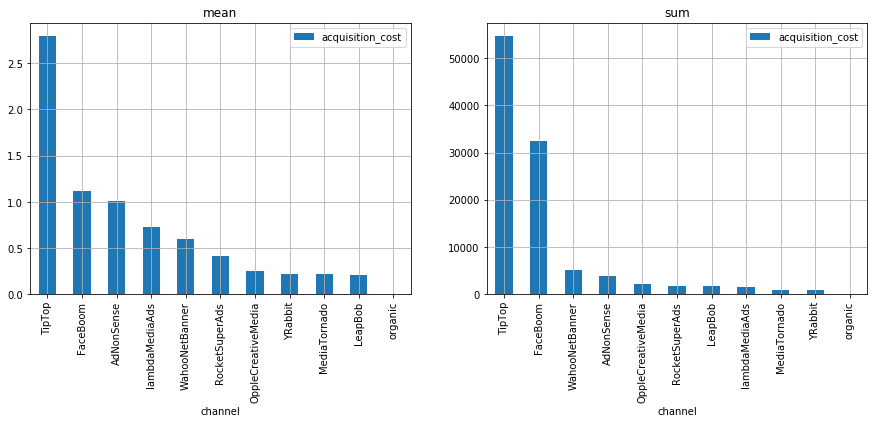

In [32]:
# Затраты на привлечение в разбивке по каналам (суммарные и в среднем на одного пользователя)
functions = ['mean', 'sum']
plt.subplots(figsize = (15,5))
for plot_num, function in enumerate(functions):
    (
    profiles.groupby('channel')
    .agg({'acquisition_cost' : function})
    .sort_values(by = 'acquisition_cost', ascending = False)
    .plot(ax=plt.subplot(1, 2, plot_num+1), kind = 'bar', grid = True, title = function, )
    )
plt.show()

### Динамика суммарных затрат

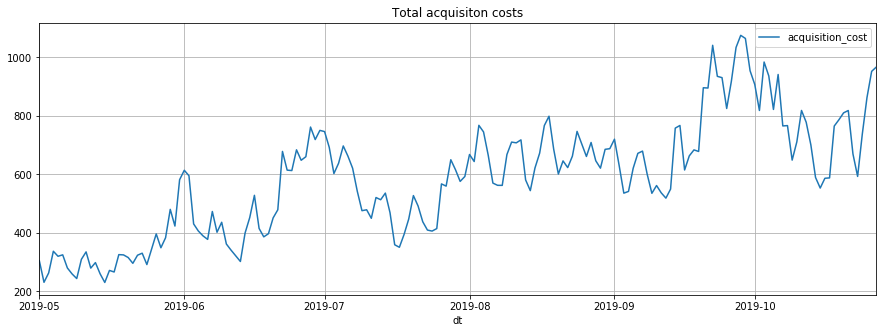

In [33]:
# динамика суммарных затрат
(
    profiles
    .groupby('dt').agg({'acquisition_cost' : 'sum'})
    .plot(figsize = (15,5), title = 'Total acquisiton costs', grid = True)
);

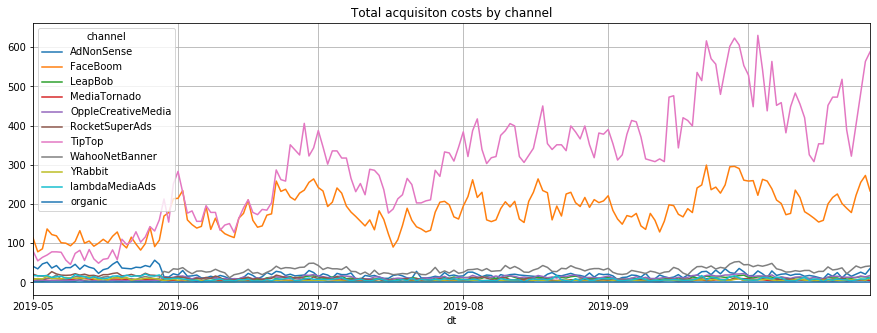

In [34]:
# динамика суммарных затрат по каналам
(
    profiles
    .pivot_table(index = 'dt', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum')
    .plot(figsize = (15,5), grid = True, title = 'Total acquisiton costs by channel')
);

### Вывод

По общим затратам лидерами являются TipTop, Faceboom, WahooNetBanner, AdNonSense. Самыми дорогими источникая являются TipTop (c очень большим запасом), Faceboom, AdNonSense, lambdaMediaAds, WahooNetBanner. Более того видно, что суммарные затраты начиная с конца мая у FaceBoom и TipTop сильно растут (похожая тенденция у WahooNetBanner (но в гораздо в меньшем масштабе) а у AdNonSense наоборот падают.  

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

## Шаг 5. Оцените окупаемость рекламы

### Проанализируйте общую окупаемость рекламы

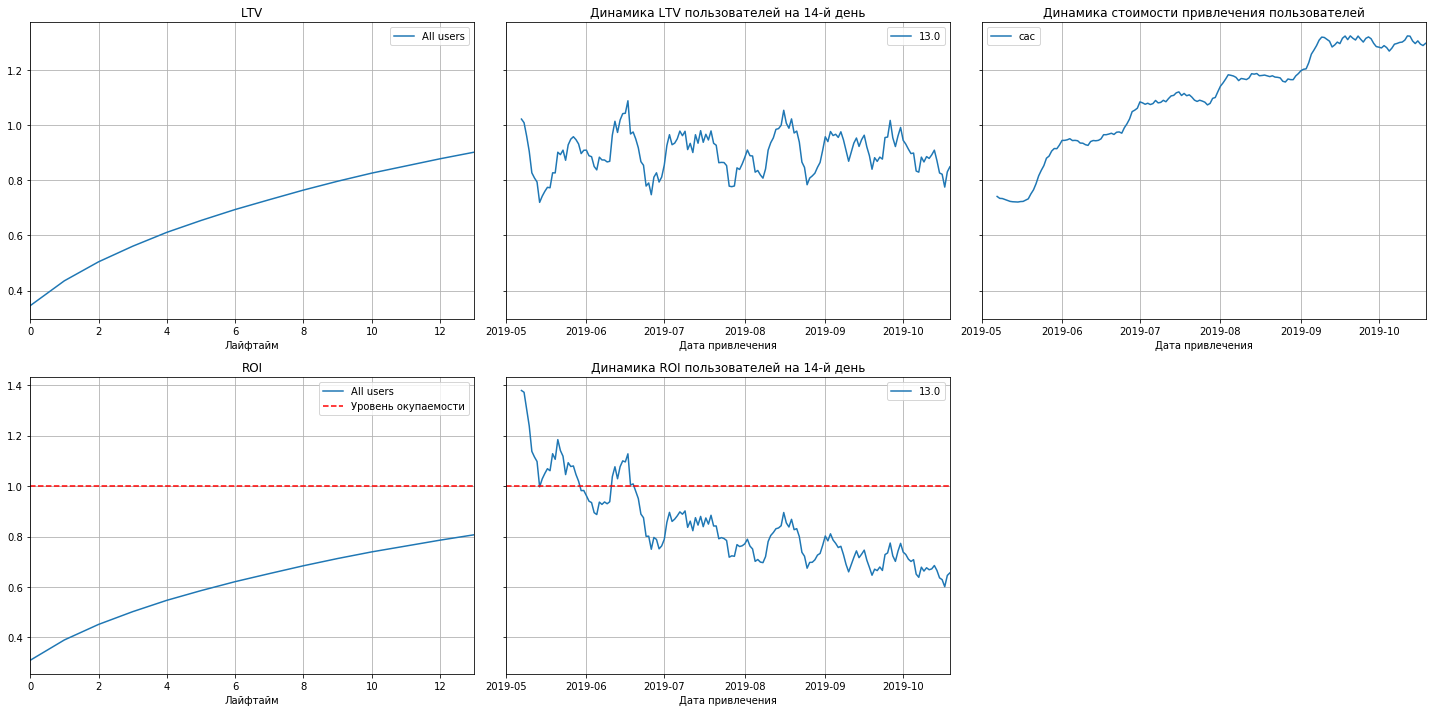

In [35]:
#исключим органический канал, чтобы он не влиял на расчет САС
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод.** LTV на 14-ый день довольно стабилен с регулярными колебаниями в пределах 0.8 - 1. С конца мая начинается резкий скачкообоазный рост стоимости привлечения. ROI в целом не превышает 1, что значит маркетинговые расходы не окупаются. Хотя мы видим, что в период с мая по июнь ROI на 14-ый день мог быть больше 1 - т.е. до повышения CAC.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

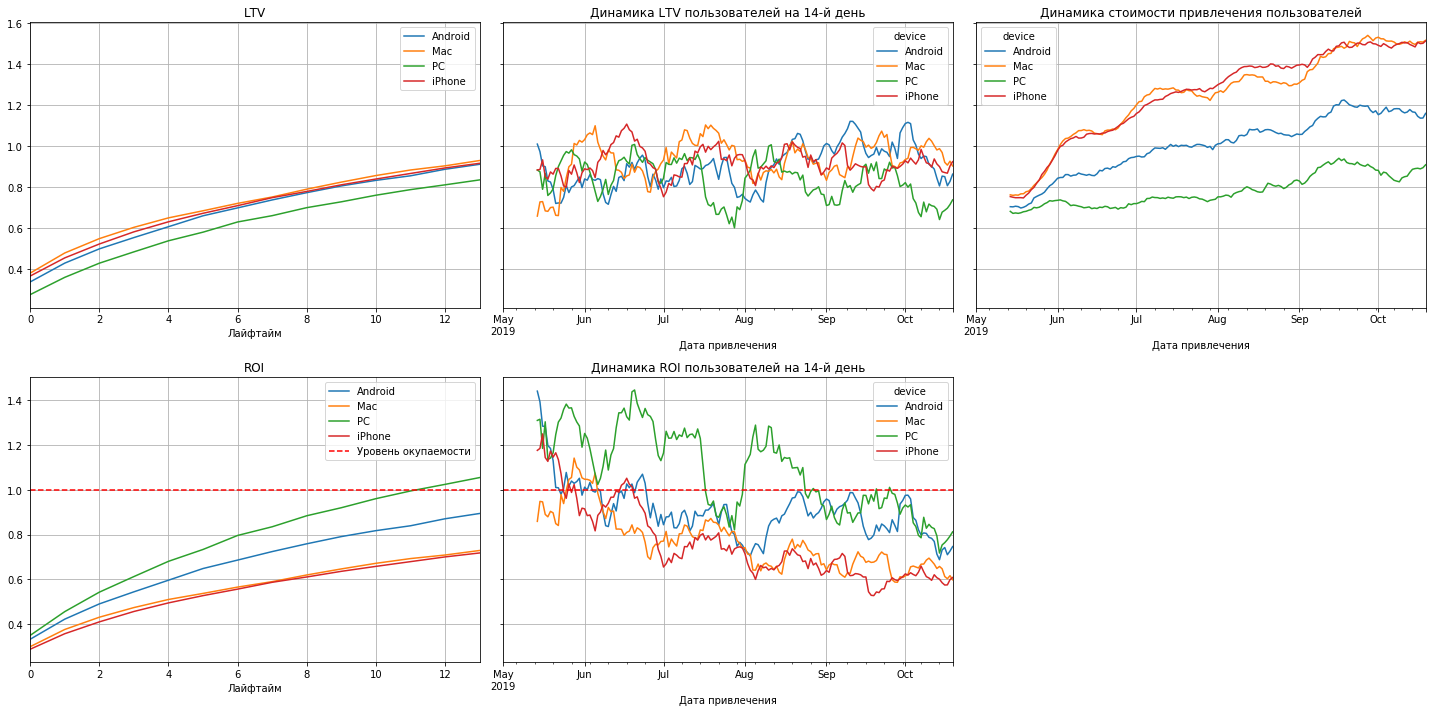

In [36]:
dimensions = ['device']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14)

In [37]:
channel_device = (
    profiles.pivot_table(index = 'region', columns = 'device', values = 'acquisition_cost', aggfunc = 'sum')
    .sort_values(by = 'iPhone', ascending = False)
)
channel_device['iPhone_Мас_%'] = (
    (channel_device['iPhone']+channel_device['iPhone'])
    /(channel_device['iPhone']+channel_device['Android']
      +channel_device['Mac']+channel_device['PC'])*100
)
channel_device

device,Android,Mac,PC,iPhone,iPhone_Мас_%
region,,,,,
United States,"18,168.73","22,585.61","9,424.12","40,750.15",89.63
UK,"1,486.48",484.69,"2,061.80","1,035.53",40.86
France,"1,521.75",530.73,"2,003.46","1,020.03",40.19
Germany,"1,283.67",493.51,"1,773.97",873.08,39.47


**Вывод.**  LTV по устройствам однороден. Небольшое отставание у PC. Хотя из-за экономии на САС у этого устройства самый большой ROI, и когорта даже начинает окупаться с 12 дня. Но начиная с сентября САС опять пошел вверх и эта когорта перестала окупаться в 14 дневный период. С конца мая затраты начали расти на всех остальных устройствах, особенно iPhone и Mac. Общий ROI у других устройств меньше 1. 

iPhone и Mac наиболее популярны в США, там их доля почти 90%. Поэтому для них характерны тенденции США.


### Проанализируйте окупаемость рекламы с разбивкой по странам

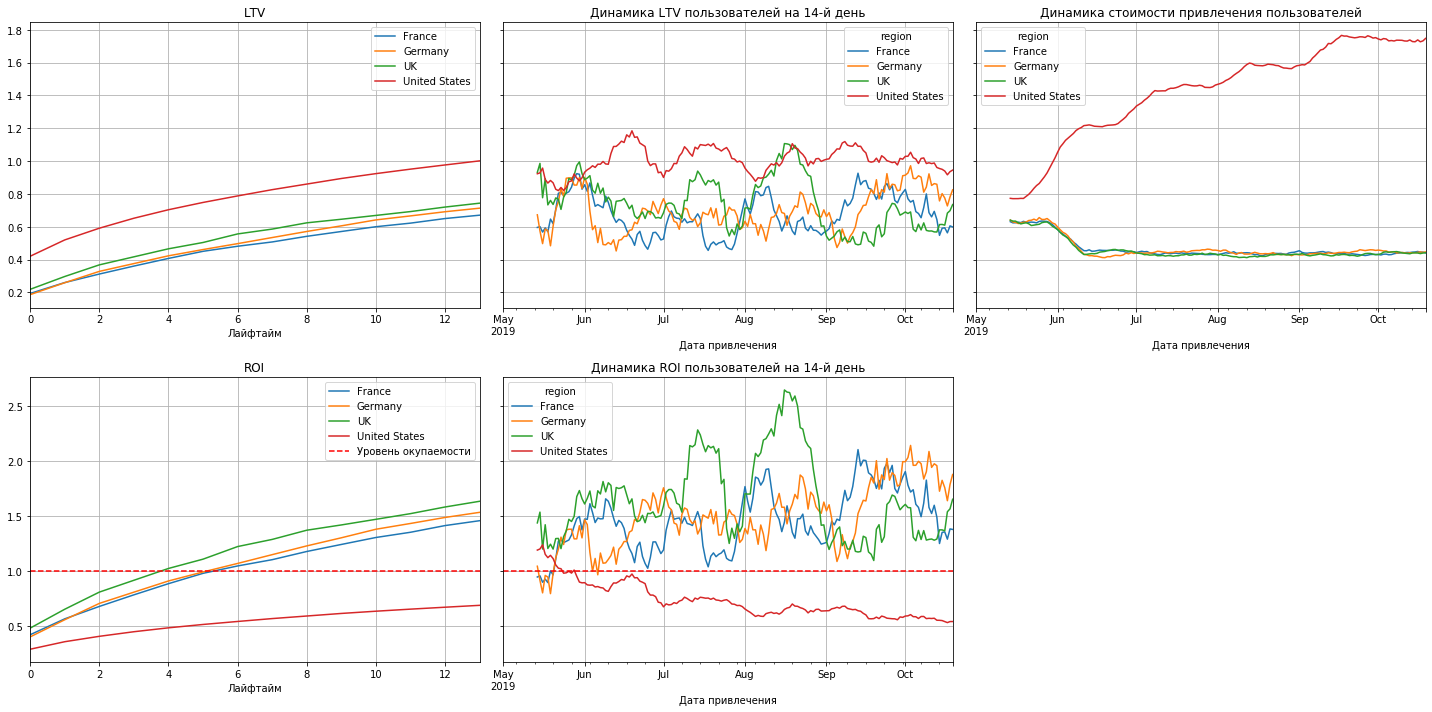

In [38]:
dimensions = ['region']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14)

**Вывод.** LTV в США самый высокий. Но также в США и  CAC  намного превышает другие страны. Во всех странах кроме США реклама окупается на 5-6 день. В США ROI на 14-ый день стабильно ниже 1, начиная с июня (как только стал расти CAC). В других странах мы даже наблюдаем в июне падение САС до постоянного уровня.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

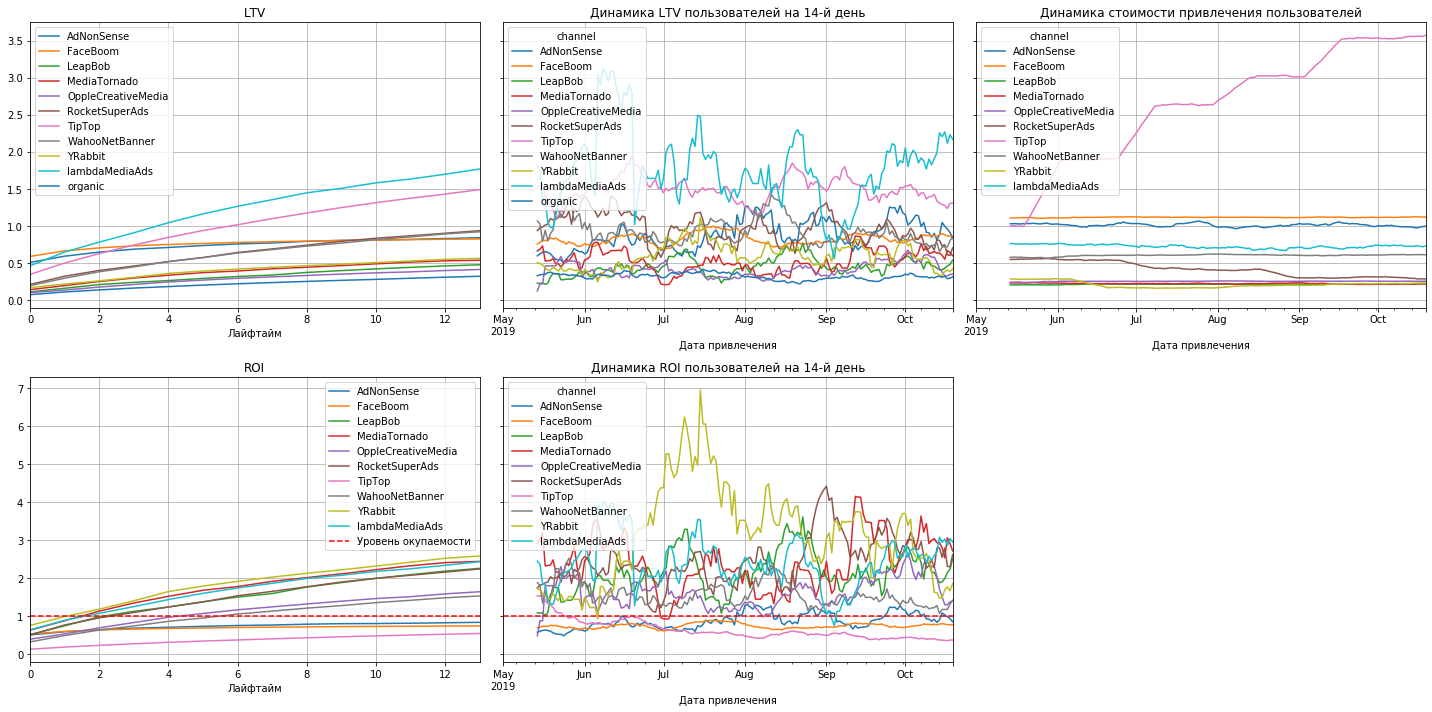

In [39]:
dimensions = ['channel']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14)

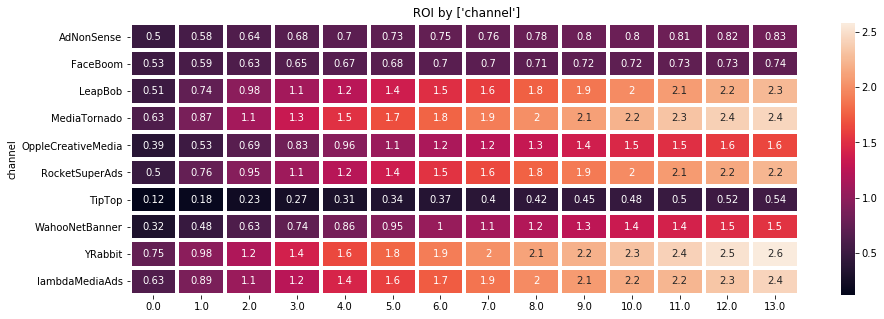

In [40]:
dimensions = ['channel']
plt.figure(figsize=(15, 5))
sns.heatmap(roi_grouped.drop(columns=['cohort_size', 'cac']), lineWidth=3, annot=True)
plt.title(f' ROI by {dimensions}')
plt.show() 

**Вывод.**

lambdaMediaAds - самый высокий LTV. Затем идут TipTop, FaceBoom, AdNonSense и RocketSuperAds (за исключением AdNonSense все в США). Самый сильный рост CAC у TipTop - он и отвечает за динамику всего общего САС. Как мы помним, TipTop является уверенным лидером и по общей сумме затрат. У всех остальных каналов CAC постоянен, с лидерами FaceBoom, AdNonSense и lambdsMediaAds и WahooNetBanner. У трех каналов: TipTop, FaceBoom и AdNonSense ROI меньше 1. Самый высокий ROI у YRabbit, у которого один из самых низких CAC. Особенно он был высокий в июле - августе, что связано с увеличением LTV при постоянных CAC. Остальные каналы примерно на одном уровне и стабильно окупаются. 

Удостоверимся, что у проблемных каналов сходные тенденции характерны для всех устройств, что дело не в багах в приложениях для конкретных устройств. Построим графики для них в разбивке пр устройствам.

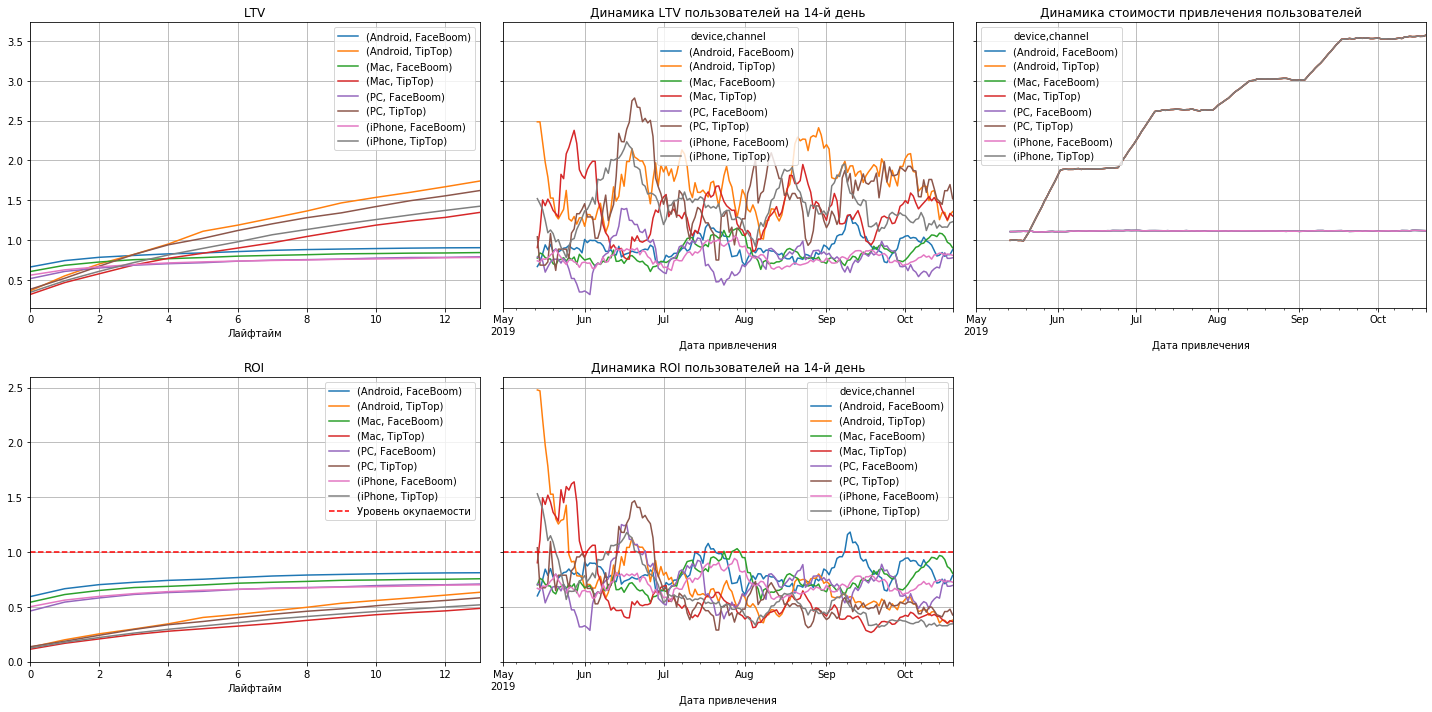

In [41]:
# проверим, различаются ли метрики убыточных каналов в США в разбивке по устройствам
dimensions = ['device', 'channel']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == "TipTop" or channel == "FaceBoom"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14)

Показатели одного канала на различных устройствах одинаковы. Дело не в конкретных приложениях.

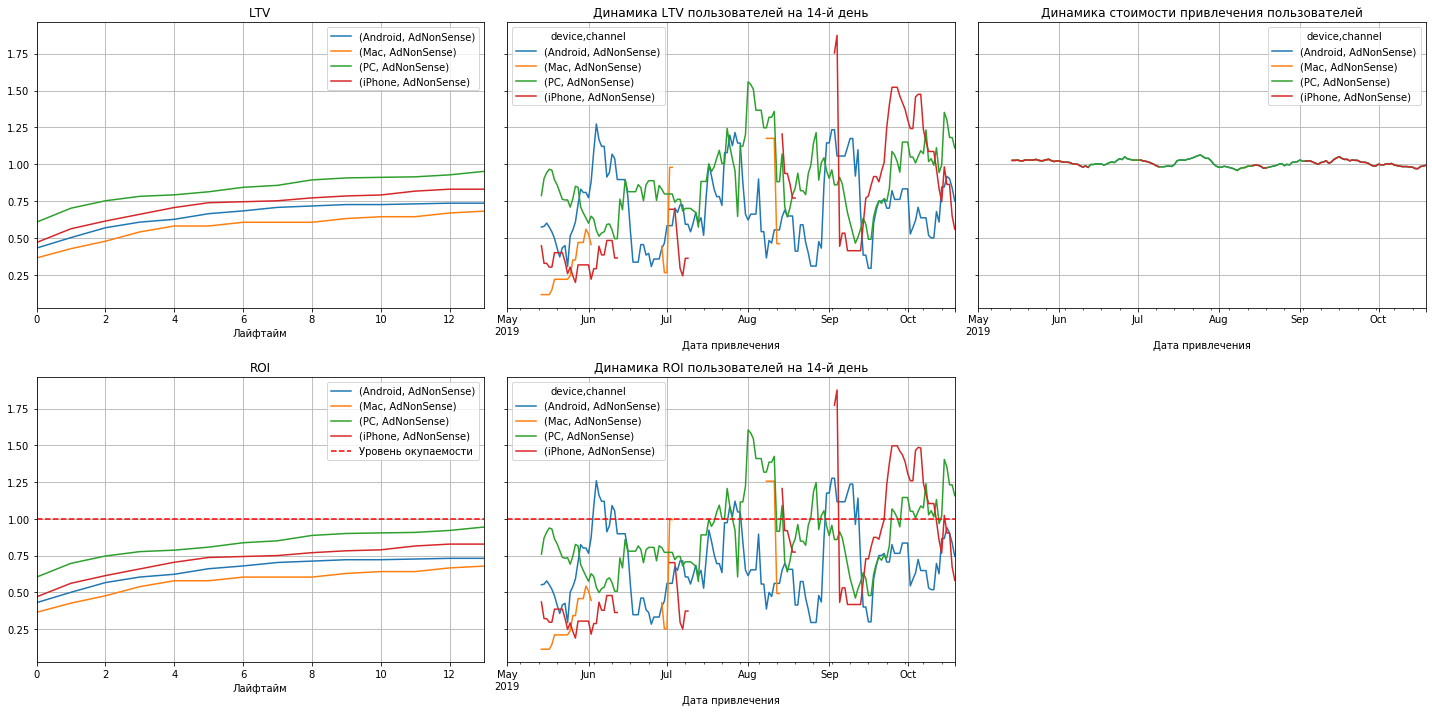

In [42]:
# проверим, различаются ли метрики AdNonSense разбивке по устройствам
dimensions = ['device', 'channel']
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == "AdNonSense"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14)

AdNonSense одинаково убыточен на всех устройствах. Хотя ближе всего к 1 PC из-за более высокого LTV.

### Вывод

*Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:*

 * *Окупается ли реклама, направленная на привлечение пользователей в целом?*
 * *Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?*

В целом реклама не окупается. Низкий общий ROI связан с тремя каналами TipTop, FaceBoom и AdNonSence. Эти каналы являются лидерами и по количеству пользователей и по затратам. У ТipTop из за резкого постоянного роста CAC ROI (на 14й день) упал ниже 1 в конце мая.  Рост САС не приводит к пропорциональному рост LTV. У двух других убыточных каналов САС постоянен но выше LTV. Группировка по устройствам и странам вторична. Конверсию и удержание будем анализировать только в группировке по отдельным каналам.

## Шаг 5. Конверсия пользователей

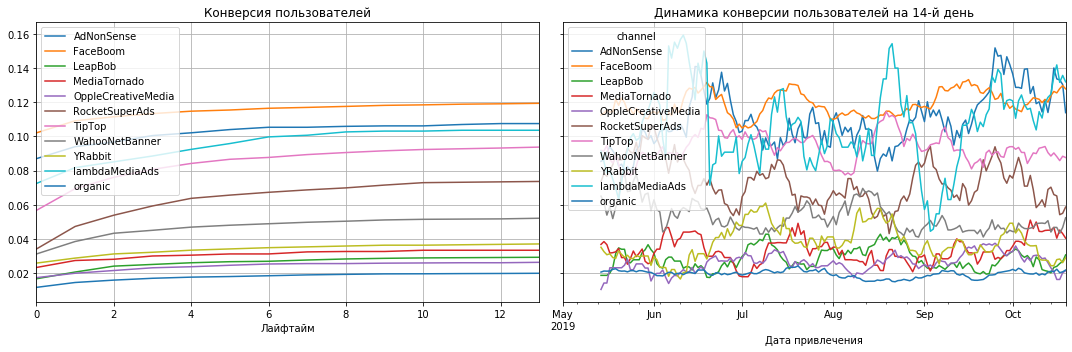

In [43]:
# смотрим конверсию с разбивкой по каналам
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14) 

*Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.
Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.*

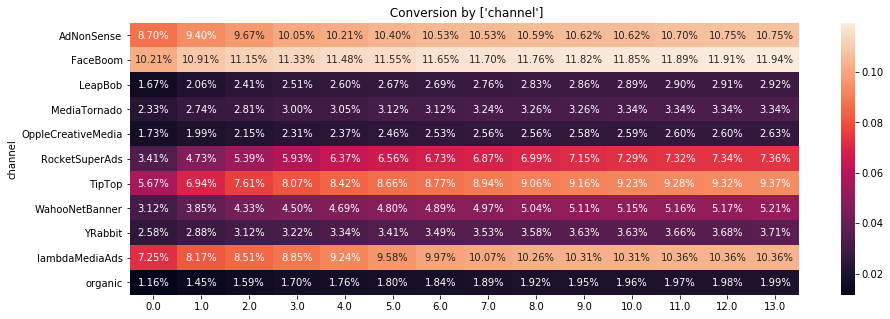

In [44]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), horizon_days, dimensions=['channel']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title(f' Conversion by {dimensions}')
plt.show() 

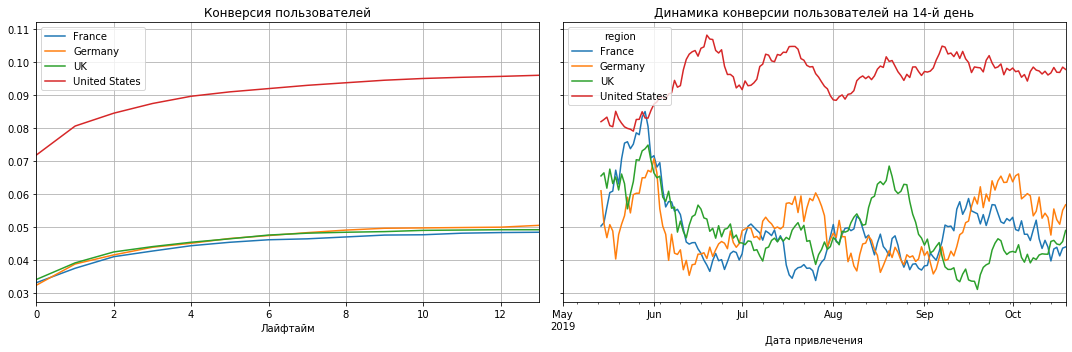

In [45]:
# смотрим конверсию с разбивкой по странам
dimensions=['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14) 

Конверсия в США выше всего из-за FaceBoom

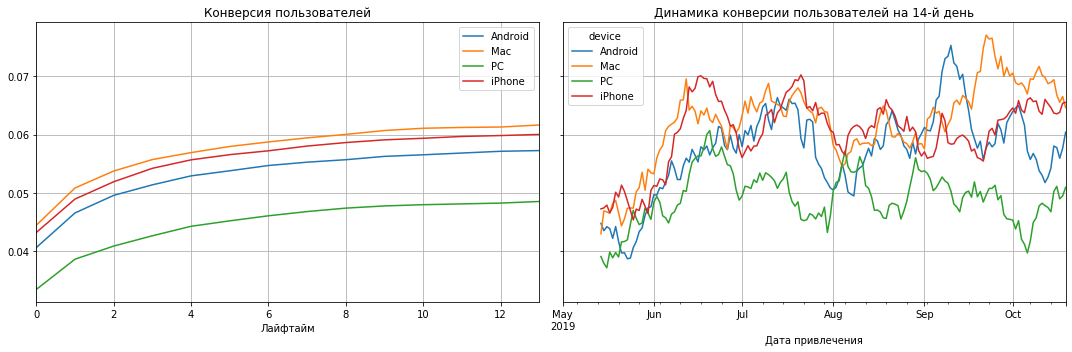

In [46]:
# смотрим конверсию с разбивкой по устройствам
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14) 

**Вывод.** Самая высокая конверсия у FaceBoom, AdNonSense, lambdaMediaAds, TipTop на четвертом месте. RocketSuperAds на пятом. WahooNetBanner на 6ом. В динамике конверсия у лидеров более-менее стабильная. У lambdaMediaAds только очень резкие пики и падения.

## Шаг 5. Удержание пользователей

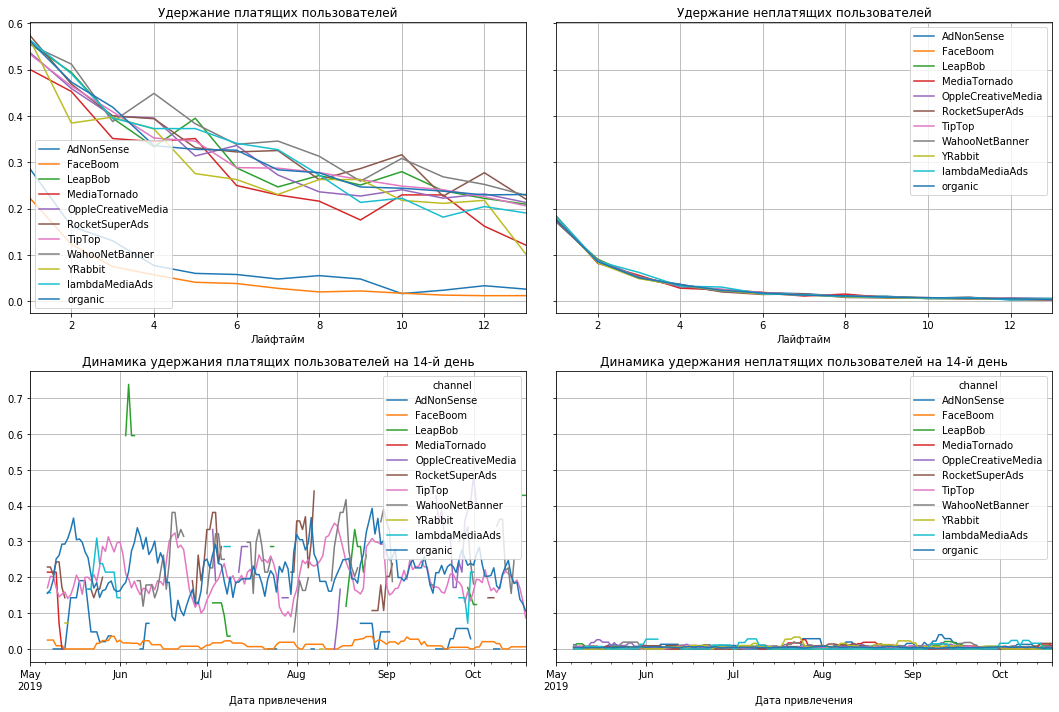

In [47]:
# смотрим удержание с разбивкой по каналам
dimensions=['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

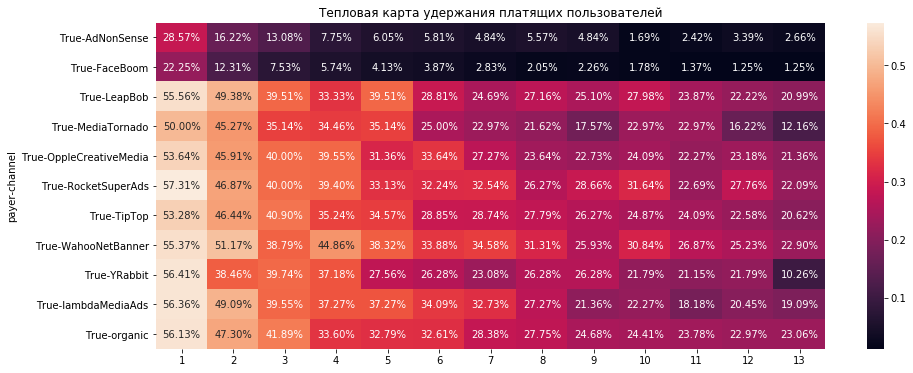

In [48]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention_grouped.query('payer == True').drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания платящих пользователей')  # название графика
plt.show()

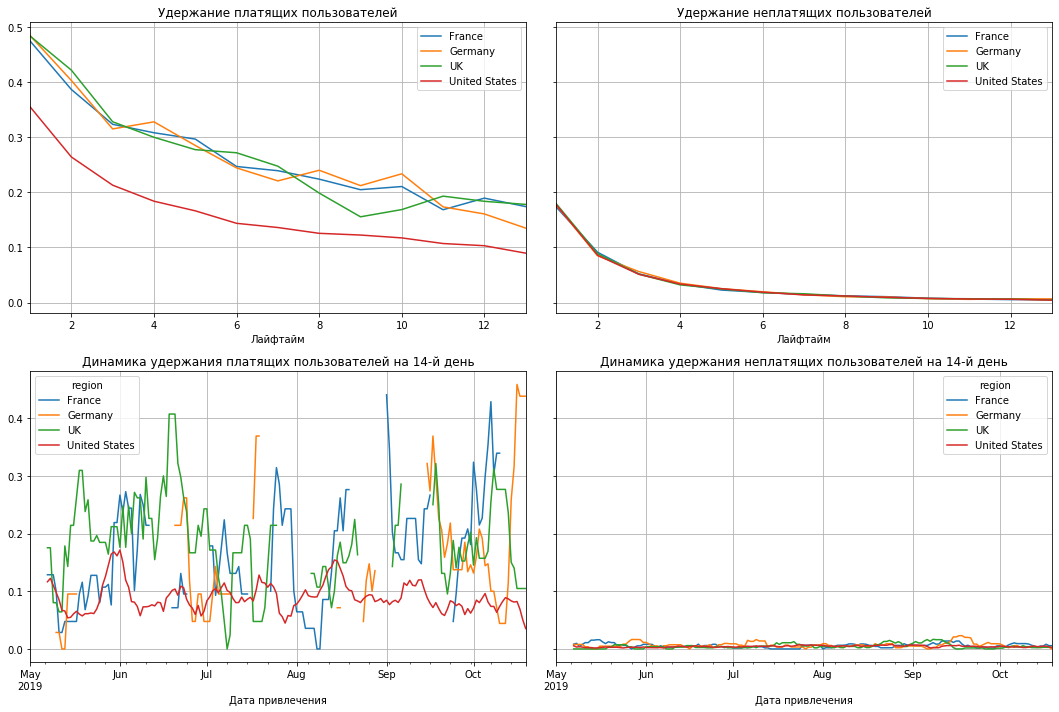

In [49]:
# смотрим удержание с разбивкой по странам
dimensions=['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Такое низкое удержание у США из-за канала FaceBoom, котой является лидером по количеству привлеченных пользователей.

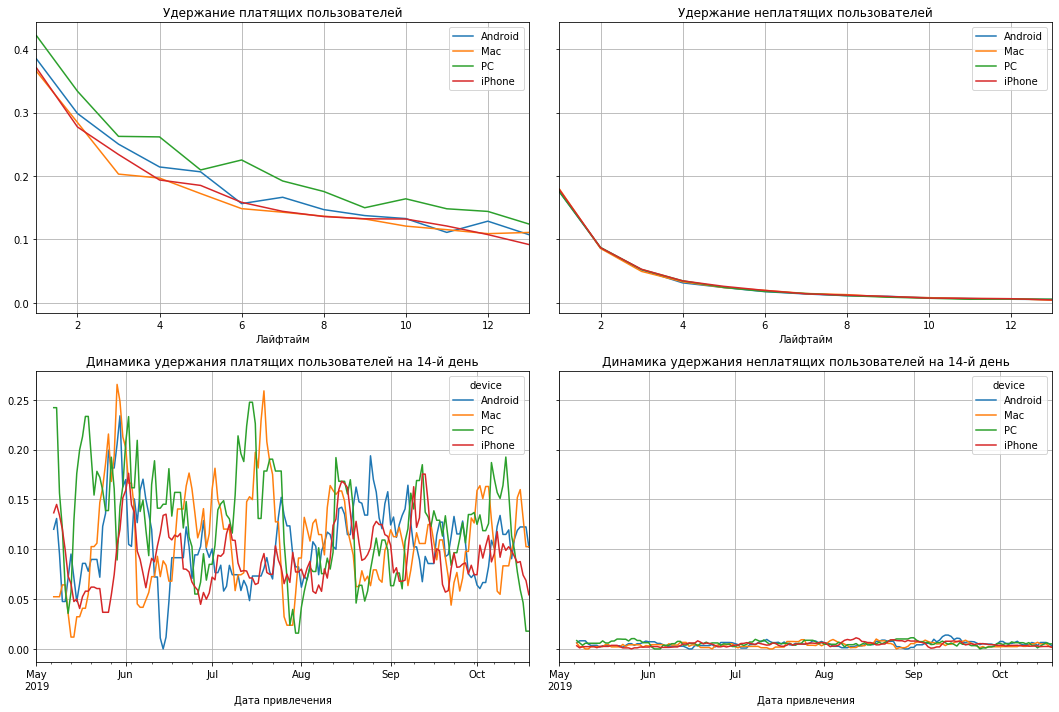

In [50]:
# смотрим удержание с разбивкой по устройствам
dimensions=['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод.** Самое низкий коэффициент удержания у FaceBoom и AdNonSense. Остальные каналы находятся в принципе на одном уровне, у RocketSuperAds и WahooNetBanner чуть повыше других. У organic довольно высокий коэффициент удержания.

## Дополнительные расчеты и рекомендации отделу маркетинга

### WAU

Посмотрим на динамику количества уникальных пользователей привлеченных через канал в неделю (WAU). Для наглядности построим два графика - США и Европа. Тк у этих рынков разные масштабы и разные каналы.

In [51]:
visits.head(2)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35


In [52]:
#рассчитаем динамику WAU в разбивке по каналам (более сглаженная динамика, чем у динамики DAU)

# приводим данные о времени к формату datetime
visits_DAU = visits.copy()
visits_DAU['session_start'] = pd.to_datetime(visits_DAU['session_start'])
# выделяем год, номер месяца и номер недели из времени начала сессии
visits_DAU['session_month'] = visits_DAU['session_start'].dt.month
visits_DAU['session_week'] = visits_DAU['session_start'].dt.week
visits_DAU['session_date'] = visits_DAU['session_start'].dt.date
visits_DAU['dt'] = pd.to_datetime(visits['session_start'].dt.date)

visits_DAU['payer'] = visits_DAU['user_id'].isin(orders['user_id'].unique())
visits_DAU.head(2)

,user_id,region,device,channel,session_start,session_end,session_month,session_week,session_date,dt,payer
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,5,18,2019-05-01,2019-05-01,False
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,5,18,2019-05-01,2019-05-01,False


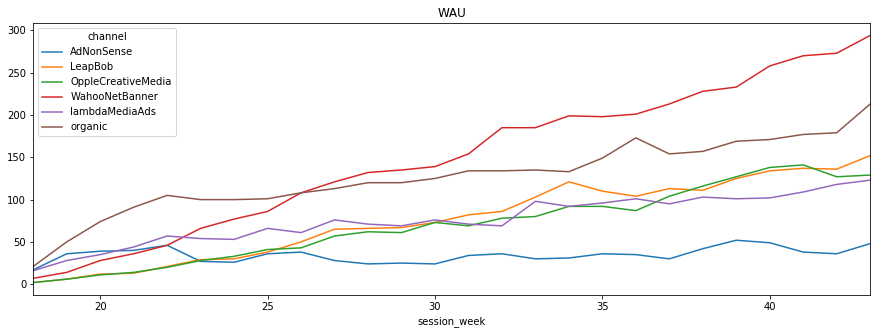

In [53]:
#считаем WAU в Европе
(
    visits_DAU
    .query('dt <= @max_date and region != "United States" and payer == True')
    .pivot_table(index = 'channel', columns = 'session_week', values = 'user_id', aggfunc = 'nunique')
    .T.plot(figsize = (15,5), title = 'WAU')
)

Больше всего в Европе регулярно привлекают пользователей WahooNetBanner и organic. AdNonSense хуже всех.

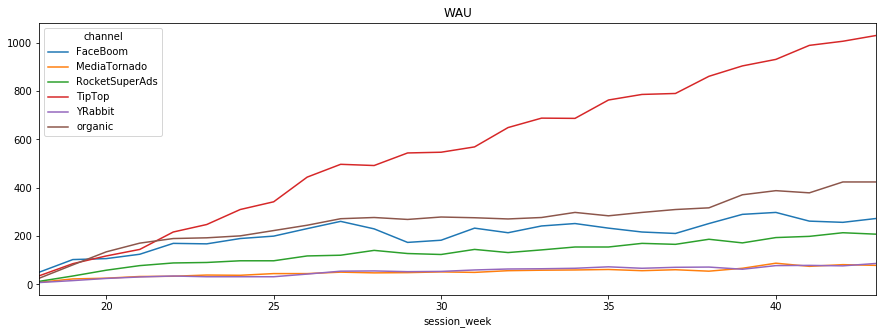

In [54]:
#считаем WAU в США
(
    visits_DAU
    .query('dt <= @max_date and region == "United States" and payer == True')
    .pivot_table(index = 'channel', columns = 'session_week', values = 'user_id', aggfunc = 'nunique')
    .T.plot(figsize = (15,5), title = 'WAU')
)

Больше всего пользователей привлекает TipTop. На втором месте organic и FaceBoom.

**Вывод.** В Европе WAU выше всего у WahooNetBanner и organic, ниже всего у AdNonsense. В США WAU выше всего у TipTop (с большим отрывом), затем идут organic и Faceboom. 

### Рекомендации

* Снизить стоимость услуг TipTop, чтобы их покрывала выручка. 
Непонятно почему все время растет САС у этого канала причем совсем непропорционально выручке. Причиной может быть неправильный выбор методики расчета стоимости рекламы (Cost Per Mille, Cost Per Click.....). Количество пользователей привлеченных через этот канал растет. Коэффициенты конверсии и удержания тоже неплохие. Это неплохой канал, если снизить его затраты.


* Оценить каналы FaceBoom и AdNonsense. C ними связаны сразу две проблемы. 
1) LTV не покрывает САС
2) Низкий коэффициент удержания. 
Коэффициент конверсии высокий, но пользователи не задерживаются долго после первой покупки. Возможно реклама дает нереальные обещания или привлекает не целевую аудиторию или раздает промокоды с большой скидкой. 


* Выбрать из уже имеющихся каналов наиболее перспективные на основе ROI, коэффициентов конверсии и удержания а также DAU/WAU и увеличить рекламные расходы на них. Например,  lambdaMediaAds, WahooNetBanner (Европа) и RocketSuperAds, YRabbit (США).


## Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

**Причины неэффективности привлечения пользователей:**
* Выручка не покрывает затраты на маркетинг у трех каналов TipTop, FaceBoom, AdNonSense
* У FaceBoom, AdNonSense низкий коэффициент удержания платящих пользователей. 

**Рекомендации:**
* Пересмотреть закупку рекламных услуг. Пересчитать цену закупки рекламы у TipTop, чтобы она была ниже выручки.
* Выявить причину низкого коэффициента удержания у FaceBoom, AdNonSense и по результатам изменить рекламную компанию. 
* Выявить более перспективные каналы привлечения и увеличить их долю в маркетинговых расходах
